<a href="https://colab.research.google.com/github/Kishan-Sinha/Campus_placement_Predictor/blob/main/model_selection_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Importing necessary models
# THESE MODELS WERE SELECTED ON THE BASIS OF RELEVANCE TO THE DATASET

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Loading the processed dataset

df = pd.read_csv('/content/sample_data/processed_dataset.csv')

df

,Unnamed: 0,Age,Gender,Average GPA,Attendance (%),Internship Done,Placement Status,In_Robotics,In_Coding Club,Knows_Machine Learning,...,Knows_Web Development,Extracirricular Activities,Domain_Consulting,Domain_Core Engineering,Domain_Hardware,Domain_Higher Studies,Domain_None,Domain_Research,Domain_Software,Backlogs_Binned
0,0,21,1,2.078191,70,1,0,1,0,1,...,0,1,1,0,0,0,0,0,0,0
1,1,19,1,2.009555,65,0,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0
2,2,19,0,2.089392,84,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,3,23,1,2.069391,62,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,4,20,1,2.090629,97,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1995,19,1,2.162173,92,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,1
1995,1996,23,0,2.110213,96,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1996,1997,18,1,2.069391,75,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1997,1998,22,1,2.090629,94,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0


**As it can be seen an extra index column was added during saving the dataset. This unnecessary column will be disposed off in further operations**

In [ ]:
# preparing the X and y data set for train test split

X = df.drop(['Unnamed: 0','Placement Status'],axis = 1)

y = df['Placement Status']

In [ ]:
# Splitting the data into different training and testing parts

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify= y)

In [ ]:
# Using Gridsearch to compare different models

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


scores = []

list1 = [{'model' : SVC(), 'param' : {'kernel' : ['linear','poly','rbf'] , 'degree':[1,2,3,4]}},
         {'model' : LogisticRegression(max_iter = 1000,solver = 'liblinear'), 'param' : {'penalty':['l1','l2']}},
         {'model' : RandomForestClassifier(), 'param' : {}},
         {'model' : DecisionTreeClassifier(class_weight='balanced'), 'param' : {}},
         {'model' : KNeighborsClassifier(), 'param' : {'n_neighbors': [3, 5, 7, 9]}}
         ]

for elements in list1:

    clf = GridSearchCV(elements['model'],elements['param'],cv = 3,return_train_score=False,n_jobs = -1)

    clf.fit(X_train, y_train)

    scores.append({'model':elements['model'],'best_score':float(clf.best_score_),'best_params':clf.best_params_})

scores

[{'model': SVC(),
  'best_score': 0.5484677923702314,
  'best_params': {'degree': 1, 'kernel': 'linear'}},
 {'model': LogisticRegression(max_iter=1000, solver='liblinear'),
  'best_score': 0.5634771732332707,
  'best_params': {'penalty': 'l2'}},
 {'model': RandomForestClassifier(),
  'best_score': 0.7723577235772359,
  'best_params': {}},
 {'model': DecisionTreeClassifier(class_weight='balanced'),
  'best_score': 0.7517198248905567,
  'best_params': {}},
 {'model': KNeighborsClassifier(),
  'best_score': 0.6378986866791746,
  'best_params': {'n_neighbors': 3}}]

In [ ]:
# using StratifiedKfold to preserve the proportion of each class label in every split

from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Further refining the parameters of the best performing model

best_params = []

list1 = [{'model' : RandomForestClassifier() , 'param' : {'criterion':['gini','entropy','log_loss'],'n_estimators' : [30,40,50,60],'bootstrap':[True,False] }}]


for elements in list1:

    clf = GridSearchCV(elements['model'],elements['param'],cv = cv,return_train_score=False,n_jobs = -1)

    clf.fit(X_train, y_train)

    best_params.append({'model':elements['model'],'best_score':float(clf.best_score_),'best_params':clf.best_params_})

best_params

[{'model': RandomForestClassifier(),
  'best_score': 0.7892432770481551,
  'best_params': {'bootstrap': False,
   'criterion': 'log_loss',
   'n_estimators': 50}}]

In [ ]:
# Training the model on the best found parameters

model = RandomForestClassifier(criterion='log_loss',n_estimators=50,bootstrap=False)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # Storing the results of test data for future evaluation

# Checking the score of the re_tuned model

model.score(X_test, y_test)

0.8275

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       193
           1       0.82      0.85      0.84       207

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



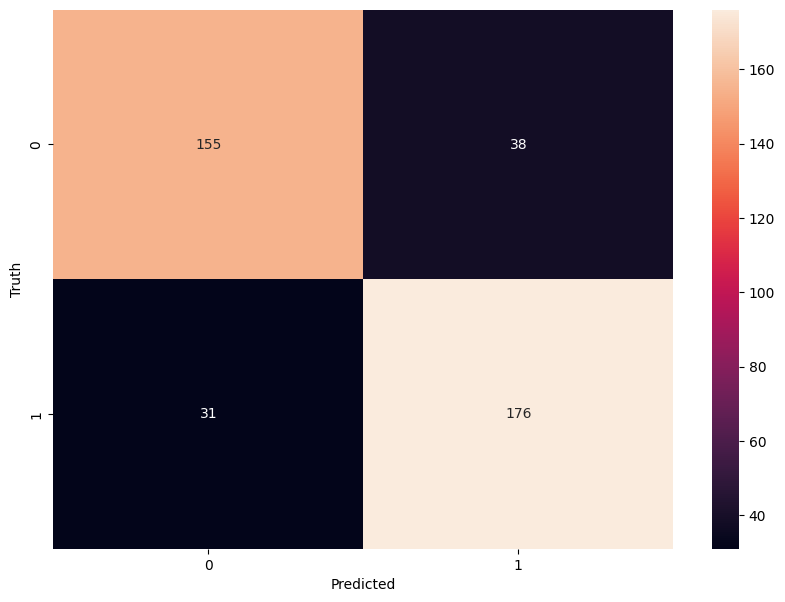

In [ ]:
# Checking model score across different metrics

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# Plotting seaborn heatmap to check the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Saving the model

import joblib
joblib.dump(model, "placement_model.pkl")

['placement_model.pkl']

**Now the model is saved in the local storage with the name specified above**